In [83]:
from fastai.vision.all import *
from torchvision.models import *

from utils import *
import sys

import pickle
import dill

from sklearn.metrics import r2_score
from sklearn.model_selection import train_test_split

import matplotlib.pyplot as plt
import matplotlib.image as mpimg

In [2]:
with open('models/M3_RN_ds3.pickle', 'rb') as f:
    learn = pickle.load(f)
    
learn = dill.loads(learn)

In [ ]:
%reload_ext autoreload
%autoreload 2
%matplotlib inline

#this function is not necessary and unfortunately sometimes has a bug. 
#But when it works, it shows relatively well the examples that the model predicts.
learn.show_results()

In [4]:
path_wiki = 'data/watches/ds3_crown/cleandata.csv'
path_imdb = 'data/watches/ds3_crown/images/'
img_size  = 255

In [5]:
df = pd.read_csv(path_wiki, index_col=0)
df_train, df_test = train_test_split(df, test_size=0.1, random_state=12)
df_train_1, df_train_2 = train_test_split(df_train, test_size=0.1, random_state=12)
df_test_1, df_test_2 = train_test_split(df_test, test_size=0.1, random_state=12)

In [6]:
def get_predictions(df, image_path):
    example_test_watches = df["image_name"].values 
    example_test_price = df["price"].values 

    predictions = []
    for watch in example_test_watches:
        predictions.append(int(learn.predict(str(image_path) + "/" + watch)[1]))
        
    return predictions, example_test_price

In [7]:
%%capture
### TIME INFORMATION: needs 3,41min on M1
y_pred, y_test = get_predictions(df_test_2, path_imdb)
y_pred_train, y_train = get_predictions(df_train_2, path_imdb)

In [8]:
print(f"The R2 score of the model on the Test Data is: {r2_score(y_test, y_pred)}")
print(f"The R2 score of the model on the Train Data is: {r2_score(y_train, y_pred_train)}")

The R2 score of the model on the Test Data is: 0.5284755886062014
The R2 score of the model on the Train Data is: 0.6531303511577198


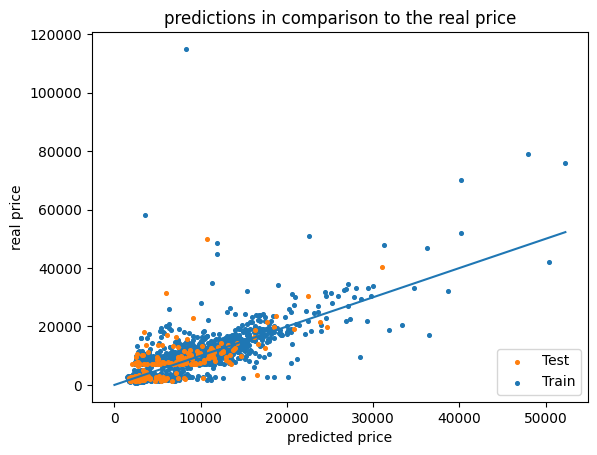

In [9]:
fig, ax = plt.subplots()

train = ax.scatter(y_pred_train, y_train, s=7, label ="Train")
test = ax.scatter(y_pred, y_test, s=7, label= "Test")

ax.plot([0,max(y_pred_train)], [0,max(y_pred_train)])
ax.set_ylabel('real price')
ax.set_xlabel('predicted price')
ax.set_title('predictions in comparison to the real price')

ax.legend(handles=[test, train], loc='lower right')

plt.show()

## Load and Test DS 2

In [25]:
ds2_path_wiki = 'data/watches/ds2_marc/cleandata.csv'
ds2_path_imdb = 'data/watches/ds2_marc/images/'
df_ds2 = pd.read_csv(ds2_path_wiki, index_col=0)

In [30]:
%%capture
### TIME INFORMATION: needs 30s on M1
y_pred_ds2, all_label_ds2 = get_predictions(df_ds2, ds2_path_imdb)

In [81]:
#Function to filter the Outlier
def filter_values(array1, array2, threshold, df):
    filtered_array1 = []
    filtered_array2 = []
    
    for i in range(len(array1)):
        if array1[i] <= threshold:
            filtered_array1.append(array1[i])
            filtered_array2.append(array2[i])
            
        else:
            picture_name = df.iloc[i]["image_name"]
            predicted_price = "{:,.0f}".format(array1[i]).replace(",", ".")
            print(f"With picture: {picture_name} the model predicts a price of {predicted_price}$ at a real price of {array2[i]}$")
    
    return filtered_array1, filtered_array2

In [82]:
y_pred_ds2_FILTERED, all_label_ds2_FILTERED = filter_values(y_pred_ds2, all_label_ds2, 40000, df_ds2)

With picture: MG210823.jpg the model predicts a price of 62.060$ at a real price of 8529.32$
With picture: MG200823.jpg the model predicts a price of 47.669$ at a real price of 13866.82$
With picture: MG5285S.jpg the model predicts a price of 566.340$ at a real price of 8529.32$
With picture: MG03105.jpg the model predicts a price of 43.034$ at a real price of 123819.32$
With picture: MG4243S.jpg the model predicts a price of 1.411.378$ at a real price of 416.32$
With picture: MG224023.jpg the model predicts a price of 58.011$ at a real price of 512.4$
With picture: MG212823.jpg the model predicts a price of 1.035.265$ at a real price of 17069.32$


## Finding the watch that looks the most expensive but is actually cheap. 

From the previous output, it appears that the watch with the filename MG4243S.jpg is valued at 1.4 million dollar although it costs only 416.32 dolllar.

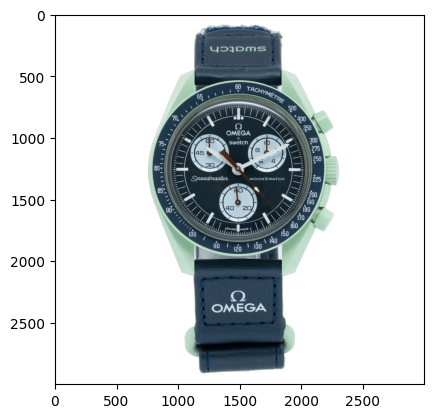

In [84]:
plt.imshow(mpimg.imread(ds2_path_imdb + '/MG4243S.jpg'))

The very wrongly estimated price can probably be explained by the collaboration from which this watch was made. This is between an Omega Speedmaster, which costs around 10 thousand dollars, and a swatch, which is considerably cheaper. The model probably cannot cope with this combination, so that the watch is clearly overestimated. Nevertheless, the goal of finding an expensive-looking watch can be considered achieved, since Omega Speedmaster watches are usually much more expensive. 

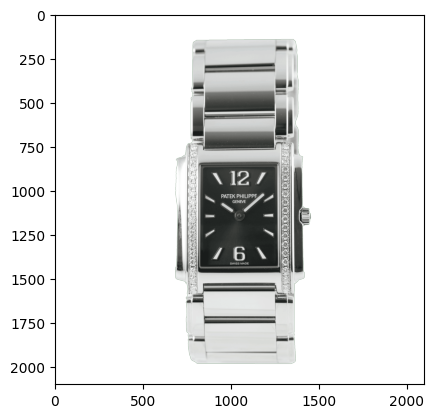

In [86]:
plt.imshow(mpimg.imread(ds2_path_imdb + '/MG212823.jpg'))

In [89]:
print(f"The R2 score on not filtered Marc Gebauer Data is: {r2_score(all_label_ds2, y_pred_ds2)}")
print(f"The R2 score on the filtered Marc Gebauer Data is: {r2_score(all_label_ds2_FILTERED, y_pred_ds2_FILTERED)}")

The R2 score on not filtered Marc Gebauer Data is: -6.488149814960137
The R2 score on the filtered Marc Gebauer Data is: -0.06758248763515207


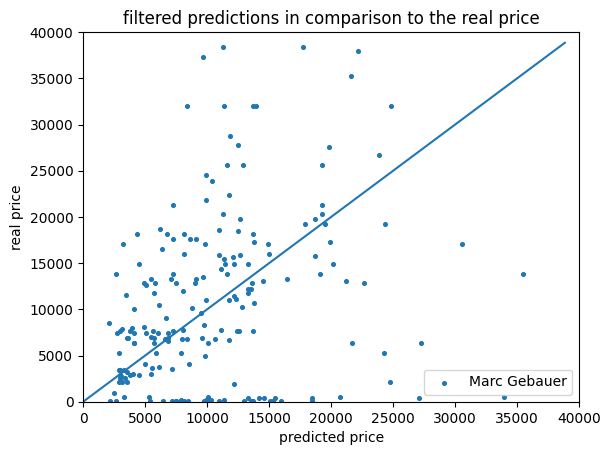

In [91]:
fig, ax = plt.subplots()

test = ax.scatter(y_pred_ds2, all_label_ds2, s=7, label ="Marc Gebauer")

ax.plot([0,max(y_pred_ds2_FILTERED)], [0,max(y_pred_ds2_FILTERED)])
ax.set_ylabel('real price')
ax.set_xlabel('predicted price')
ax.set_title('filtered predictions in comparison to the real price')

ax.legend(handles=[test], loc='lower right')
ax.set_ylim(0, 40000)  
ax.set_xlim(0, 40000)  

plt.show()